# PCA usando imágenes

La base de datos MNIST de dígitos escritos a mano, han sido normalizados tamaño y centrados en una imagen de tamaño fijo.
<br>
Es una buena base de datos para las personas que desean probar técnicas de aprendizaje y métodos de reconocimiento de patrones en datos del mundo real, que no impliquen cambios y ajustes en su formato.

Parameters | Number
--- | ---
Classes | 10
Samples per class | ~7000 samples per class
Samples total | 70000
Dimensionality | 784
Features | integers values from 0 to 255

The MNIST database of handwritten digits is available on the following website: [MNIST Dataset](http://yann.lecun.com/exdb/mnist/)

In [1]:
%matplotlib inline
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Descarga de los datos

In [ ]:
# Vamos a descargarla de openml aunque también la podeis encontrar en un formato reducido en scikit
mnist = fetch_openml('mnist_784')

In [13]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [98]:
#Vamos a realizar una exploración inicial del conjunto de datos

Siempre que vayamos a trabajar con conjuntos de datos es muy recomendable separar 2 conjuntos: entrenamiento y test

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=33)

print("Tamaño entrenamiento: " + str(X_train.shape[0]))
print("Tamaño test: " + str(X_test.shape[0]))

Tamaño entrenamiento: 56000
Tamaño test: 14000


### Aplicación PCA

In [126]:
PCA?

In [26]:
pca = PCA(.95)

Realizamos una reducción de la dimensionalidad de nuestros datos

In [40]:
lower_dimensional_data = pca.fit_transform(X_train)

In [41]:
pca.n_components_

154

Una de las cosas interesantes de PCA es que podemos pasar de una representación comprimida a una aproximación de los datos con las dimensiones originales.

In [42]:
approximation = pca.inverse_transform(lower_dimensional_data)

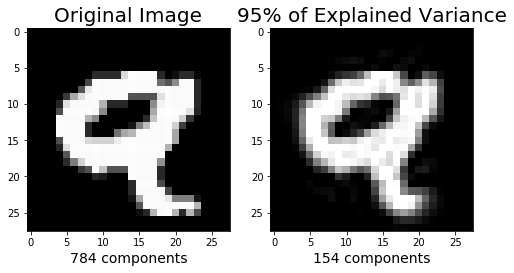

In [45]:
plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(X_train[1].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[1].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('154 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20);

### Plot de la varianza acumulada según el número de componentes

In [61]:
# Si no ponemos ningún parámetro, obtendremos todas las componentes
pca = PCA()
pca.fit(X_train);

In [63]:
pca.n_components_

784

In [69]:
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])

[9.761741410392037, 7.150765823950042, 6.155230494571446, 5.417526982999085, 4.885923370469144]


In [70]:
# Cumulative explained variance
cum_var_exp = np.cumsum(var_exp) 

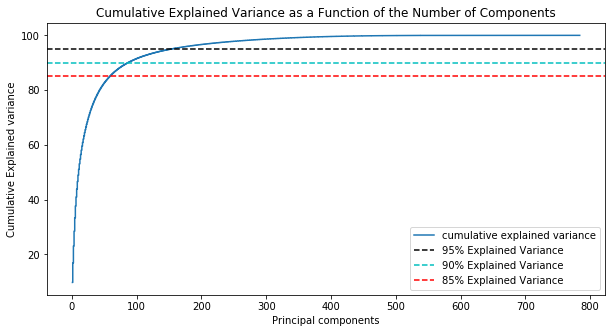

In [72]:
plt.figure(figsize=(10, 5))
plt.step(range(1, 785), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

### Visualización de la pérdida de información
Vamos a observar como perdemos información cada vez que realizamos la reconstrucción de la imagen original a medida que usamos menos componentes.

In [76]:
# Indices corresponding to the first occurrence are returned with the np.argmax function
# Adding 1 to the end of value in list as principal components start from 1 and indexes start from 0 (np.argmax)
componentsVariance = [784, np.argmax(cum_var_exp > 99) + 1, np.argmax(cum_var_exp > 95) + 1, np.argmax(cum_var_exp > 90) + 1, np.argmax(cum_var_exp >= 85) + 1]

In [77]:
componentsVariance

[784, 331, 154, 87, 59]

In [73]:
from sklearn.decomposition import PCA

def explainedVariance(percentage, images): 
    # percentage should be a decimal from 0 to 1 
    pca = PCA(percentage)
    pca.fit(images)
    components = pca.transform(images)
    approxOriginal = pca.inverse_transform(components)
    return approxOriginal

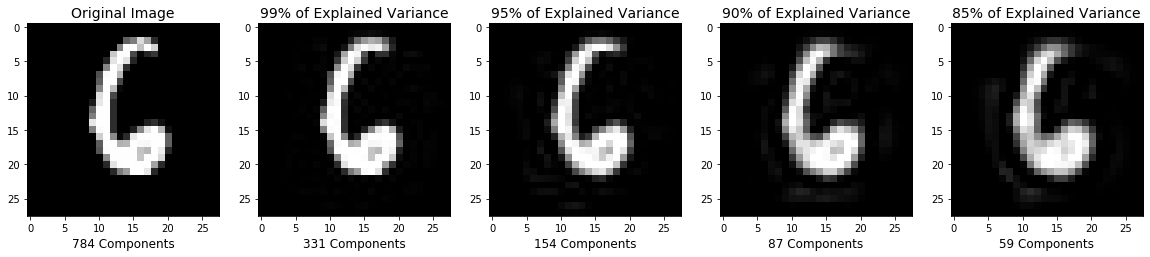

In [75]:
plt.figure(figsize=(20,4));

# Original Image (784 components)
plt.subplot(1, 5, 1);
plt.imshow(X_test[5].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 Components', fontsize = 12)
plt.title('Original Image', fontsize = 14);

# 331 principal components
plt.subplot(1, 5, 2);
plt.imshow(explainedVariance(.99, X_test)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('331 Components', fontsize = 12)
plt.title('99% of Explained Variance', fontsize = 14);

# 154 principal components
plt.subplot(1, 5, 3);
plt.imshow(explainedVariance(.95, X_test)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('154 Components', fontsize = 12)
plt.title('95% of Explained Variance', fontsize = 14);

# 87 principal components
plt.subplot(1, 5, 4);
plt.imshow(explainedVariance(.90, X_test)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('87 Components', fontsize = 12)
plt.title('90% of Explained Variance', fontsize = 14);

# 59 principal components
plt.subplot(1, 5, 5);
plt.imshow(explainedVariance(.85, X_test)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('59 Components', fontsize = 12)
plt.title('85% of Explained Variance', fontsize = 14);

## Eliminación de ruido usando PCA

Para hacer esta prueba, cogeremos una muestra del conjunto de test y le apicaremos ruido. Veremos como podemos suavizarlos usando PCA

Text(0.5, 1.0, 'ruido')

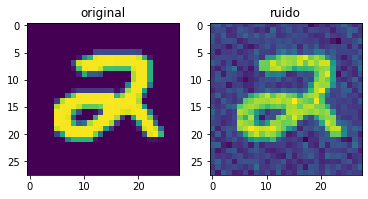

In [124]:
index = 600
prueba = np.copy(X_test[index])

noise = np.random.normal(100, 25, X_test[0].shape)

prueba = prueba + noise

plt.figure()
plt.subplot(1,2,1)
plt.imshow(X_test[index].reshape(28,28));
plt.title("original")
plt.subplot(1,2,2)
plt.imshow(prueba.reshape(28,28));
plt.title("ruido")



In [105]:
# Recalculamos el PCA
pca = PCA(.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

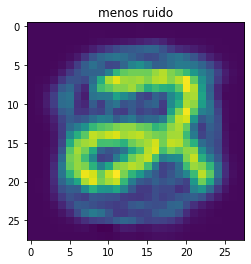

In [127]:
# Eliminamos el ruido
prueba_lower = pca.transform(prueba.reshape(1,-1))
nueva = pca.inverse_transform(prueba_lower)
plt.imshow(nueva.reshape(28,28));
plt.title("menos ruido");